# 서울의 집값은 학군에 더 영향을 많이 받을까 번화한 정도에 더 영향을 많이 받을까?( 2018년 기준 )

## 가설 1-1. 
집값과 학군은 양의 상관관계를 가질 것이다.
## 가설 1-2. 
집값과 번화한 정도는 양의 상관관계를 가질 것이다.

## 가설 2. 
집값은 학군보다 번화한 정도에 더 큰 상관관계를 가질 것이다. 

## 정의
 * 학군이란?
    * 중학교에서 특수목적고로 진학하는 비율
    
 * 부동산 매매 가격?
    * 아파트 거래 가격
    
 * 번화하다?
    * 유동인구수에 따라 번화한지를 판단함
        * 유동인구수?
            * 지하철 이용객 수



## 결과
서울의 집값은 번화한 정도(지하철 이용객 수)와는 거의 연관성이 없고 학군과는 양의 상관관계를 갖는다.

In [63]:
# 1. 라이브러리 호출
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. 시각화 설정
from matplotlib import font_manager, rc
from matplotlib import style
style.use('ggplot')
%matplotlib inline

# 3. 한글폰트를 설정(한글을 사용한다면 반드시해야 함)
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥OS인 경우 위 두 줄을 입력하지 말고 아래 코드를 입력하세요
#rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 4. 해상도
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [2]:
graduate_path = f'data/part1_2018년_2차_졸업생의_진로_현황(전체).xlsx'
raw_graduate = pd.read_excel(graduate_path, sheet_name='2018_졸업생의 진로 현황(중)')

In [3]:
raw_graduate.shape

(3459, 61)

In [4]:
raw_graduate.head()

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,진학자 계.2,진학자 계.3,취업자,취업자.1,취업자.2,취업자.3,(미진학자)무직자 및 미상,(미진학자)무직자 및 미상.1,(미진학자)무직자 및 미상.2,(미진학자)무직자 및 미상.3
0,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,합계,비율,남,여,합계,비율,남,여,합계,비율
1,서울특별시교육청,교육부,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,03,국립,주간,N,NaN,...,234,100,0,0,0,0,0,0,0,0
2,서울특별시교육청,교육부,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,03,국립,주간,N,NaN,...,172,100,0,0,0,0,0,0,0,0
3,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 강남구,S010000698,개원중학교,03,공립,주간,N,NaN,...,214,100,0,0,0,0,0,0,0,0
4,서울특별시교육청,서울특별시강남서초교육지원청,서울특별시 서초구,S010000700,경원중학교,03,공립,주간,N,NaN,...,310,100,0,0,0,0,0,0,0,0


In [5]:
raw_graduate.tail()

,시도교육청,지역교육청,지역,정보공시 \n 학교코드,학교명,학교급코드,설립구분,주야간,제외여부,제외사유,...,진학자 계.2,진학자 계.3,취업자,취업자.1,취업자.2,취업자.3,(미진학자)무직자 및 미상,(미진학자)무직자 및 미상.1,(미진학자)무직자 및 미상.2,(미진학자)무직자 및 미상.3
3454,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000844,탐라중학교,03,공립,주간,N,NaN,...,297,99.7,0,0,0,0,1,0,1,0.3
3455,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000512,제주영지학교,05,공립,주간,N,NaN,...,12,100,0,0,0,0,0,0,0,0
3456,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000513,제주영송학교,05,사립,주간,N,NaN,...,21,100,0,0,0,0,0,0,0,0
3457,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 서귀포시,S170000790,서귀포온성학교,05,공립,주간,N,NaN,...,9,100,0,0,0,0,0,0,0,0
3458,제주특별자치도교육청,제주시교육지원청,제주특별자치도 제주시,S170000870,제주제일중학교부설방송통신중학교,25,공립,NaN,Y,2019년 졸업예정이므로 제외,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
raw_graduate.index

RangeIndex(start=0, stop=3459, step=1)

In [7]:
raw_graduate.columns

Index(['시도교육청', '지역교육청', '지역', '정보공시 \n 학교코드', '학교명', '학교급코드', '설립구분', '주야간',
       '제외여부', '제외사유', '졸업자', '졸업자.1', '졸업자.2', '일반고 진학자', '일반고 진학자.1',
       '일반고 진학자.2', '일반고 진학자.3', '특성화고 진학자', '특성화고 진학자.1', '특성화고 진학자.2',
       '특성화고 진학자.3', '(특수목적고)과학고 진학자', '(특수목적고)과학고 진학자.1', '(특수목적고)과학고 진학자.2',
       '(특수목적고)과학고 진학자.3', '(특수목적고)외고ㆍ국제고 진학자', '(특수목적고)외고ㆍ국제고 진학자.1',
       '(특수목적고)외고ㆍ국제고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.3', '(특수목적고)예고ㆍ체고 진학자',
       '(특수목적고)예고ㆍ체고 진학자.1', '(특수목적고)예고ㆍ체고 진학자.2', '(특수목적고)예고ㆍ체고 진학자.3',
       '(특수목적고)마이스터고 진학자', '(특수목적고)마이스터고 진학자.1', '(특수목적고)마이스터고 진학자.2',
       '(특수목적고)마이스터고 진학자.3', '(자율고)자율형사립고 진학자', '(자율고)자율형사립고 진학자.1',
       '(자율고)자율형사립고 진학자.2', '(자율고)자율형사립고 진학자.3', '(자율고)자율형공립고 진학자',
       '(자율고)자율형공립고 진학자.1', '(자율고)자율형공립고 진학자.2', '(자율고)자율형공립고 진학자.3', '기타 진학자',
       '기타 진학자.1', '기타 진학자.2', '기타 진학자.3', '진학자 계', '진학자 계.1', '진학자 계.2',
       '진학자 계.3', '취업자', '취업자.1', '취업자.2', '취업자.3', '(미진학자)무직자 및 미상',
       '(미진학자)무직자 및 미상.1', '(미진학자)무직자 및 미상.2', '(

In [8]:
raw_graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3459 entries, 0 to 3458
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   시도교육청                3459 non-null   object
 1   지역교육청                3459 non-null   object
 2   지역                   3457 non-null   object
 3   정보공시 
 학교코드          3459 non-null   object
 4   학교명                  3459 non-null   object
 5   학교급코드                3459 non-null   object
 6   설립구분                 3459 non-null   object
 7   주야간                  3425 non-null   object
 8   제외여부                 3459 non-null   object
 9   제외사유                 35 non-null     object
 10  졸업자                  3425 non-null   object
 11  졸업자.1                3425 non-null   object
 12  졸업자.2                3425 non-null   object
 13  일반고 진학자              3425 non-null   object
 14  일반고 진학자.1            3425 non-null   object
 15  일반고 진학자.2            3425 non-null   object
 16  일반고 진학

In [9]:
select_col = raw_graduate[['지역', '학교명','정보공시 \n 학교코드', '졸업자.2', '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
select_col.columns = ['지역', '학교명', '학교코드', '졸업자', '과고', '외고']
graduate_data = select_col.drop(0)

In [10]:
graduate_data['졸업자'] = pd.to_numeric(graduate_data['졸업자'])
graduate_data['과고'] = pd.to_numeric(graduate_data['과고'])
graduate_data['외고'] = pd.to_numeric(graduate_data['외고'])
graduate_data['총합'] = graduate_data['과고'] + graduate_data['외고']
graduate_data

,지역,학교명,학교코드,졸업자,과고,외고,총합
1,서울특별시 성북구,서울대학교사범대학부설중학교,S000003514,234.0,4.0,5.0,9.0
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,S000003562,172.0,0.0,8.0,8.0
3,서울특별시 강남구,개원중학교,S010000698,214.0,2.0,9.0,11.0
4,서울특별시 서초구,경원중학교,S010000700,310.0,5.0,4.0,9.0
5,서울특별시 강남구,구룡중학교,S010000701,256.0,3.0,4.0,7.0
...,...,...,...,...,...,...,...
3454,제주특별자치도 제주시,탐라중학교,S170000844,298.0,1.0,1.0,2.0
3455,제주특별자치도 제주시,제주영지학교,S170000512,12.0,0.0,0.0,0.0
3456,제주특별자치도 제주시,제주영송학교,S170000513,21.0,0.0,0.0,0.0
3457,제주특별자치도 서귀포시,서귀포온성학교,S170000790,9.0,0.0,0.0,0.0


In [11]:
def get_province(x):
    temp = x.split(' ')
    sido = temp[0]
    if len(sido) == 4:        
        return (sido[0] + sido[2])
    else:
        return (sido[0:2])    
    return 

graduate_data['시도'] = graduate_data['지역'].dropna().apply(get_province)
graduate_data['구군'] = graduate_data['지역'].dropna().apply(lambda x: x.split(' ')[1])

In [12]:
# 신정중학교
graduate_data.at[588,'시도'] = '부산' 
graduate_data.at[588,'구군'] = '기장군'
# 은풍중학교
graduate_data.at[3011,'시도'] = '경북'
graduate_data.at[3011,'구군'] = '예천군'

In [13]:
def graduate_preprocrssing(path):
    raw_graduate = pd.read_excel(path, sheet_name='2018_졸업생의 진로 현황(중)')
    select_col = raw_graduate[['지역', '학교명','정보공시 \n 학교코드', '졸업자.2', '(특수목적고)과학고 진학자.2','(특수목적고)외고ㆍ국제고 진학자.2']]
    select_col.columns = ['지역', '학교명', '학교코드', '졸업자', '과고', '외고']
    graduate_data = select_col.drop(0)
    graduate_data['과고'] = pd.to_numeric(graduate_data['과고'])
    graduate_data['외고'] =  pd.to_numeric(graduate_data['외고']) 
    graduate_data['졸업자'] =  pd.to_numeric(graduate_data['졸업자']) 
    graduate_data['총합'] = graduate_data['과고'] + graduate_data['외고']
    
    def get_province(x):
        temp = x.split(' ')[0]
        if len(temp) != 4:
            return temp[:2]
        else:
            return temp[0] + temp[2]
    
    graduate_data['시도'] = graduate_data['지역'].dropna().apply(get_province)
    graduate_data['구군'] = graduate_data['지역'].dropna().apply(lambda x: x.split(' ')[1])
    
    graduate_data.at[588,'시도'] = '부산'
    graduate_data.at[588,'구군'] = '기장군'
    graduate_data.at[3011,'시도'] = '경북'
    graduate_data.at[3011,'구군'] = '예천군'
    
    return graduate_data

In [14]:
gradu_df = graduate_preprocrssing(graduate_path)

In [15]:
gradu_df

,지역,학교명,학교코드,졸업자,과고,외고,총합,시도,구군
1,서울특별시 성북구,서울대학교사범대학부설중학교,S000003514,234.0,4.0,5.0,9.0,서울,성북구
2,서울특별시 종로구,서울대학교사범대학부설여자중학교,S000003562,172.0,0.0,8.0,8.0,서울,종로구
3,서울특별시 강남구,개원중학교,S010000698,214.0,2.0,9.0,11.0,서울,강남구
4,서울특별시 서초구,경원중학교,S010000700,310.0,5.0,4.0,9.0,서울,서초구
5,서울특별시 강남구,구룡중학교,S010000701,256.0,3.0,4.0,7.0,서울,강남구
...,...,...,...,...,...,...,...,...,...
3454,제주특별자치도 제주시,탐라중학교,S170000844,298.0,1.0,1.0,2.0,제주,제주시
3455,제주특별자치도 제주시,제주영지학교,S170000512,12.0,0.0,0.0,0.0,제주,제주시
3456,제주특별자치도 제주시,제주영송학교,S170000513,21.0,0.0,0.0,0.0,제주,제주시
3457,제주특별자치도 서귀포시,서귀포온성학교,S170000790,9.0,0.0,0.0,0.0,제주,서귀포시


In [16]:
gradu_seoul=gradu_df[gradu_df['시도']=='서울'].copy()
gradu_seoul_gugun = gradu_seoul.groupby('구군').sum()

In [17]:
gradu_seoul_gugun['진학률'] = gradu_seoul_gugun['총합'] / gradu_seoul_gugun['졸업자'] * 100
gradu_gugun=gradu_seoul_gugun.sort_values(by='진학률', ascending=False)
gradu_gugun

,졸업자,과고,외고,총합,진학률
구군,,,,,
도봉구,2580.0,10.0,91.0,101.0,3.914729
강남구,5224.0,80.0,122.0,202.0,3.866769
노원구,6161.0,46.0,176.0,222.0,3.603311
강북구,2355.0,14.0,69.0,83.0,3.524416
종로구,1127.0,7.0,32.0,39.0,3.460515
광진구,2932.0,29.0,69.0,98.0,3.342428
양천구,5742.0,53.0,127.0,180.0,3.134796
서초구,3780.0,52.0,66.0,118.0,3.121693
성북구,3382.0,20.0,81.0,101.0,2.986399


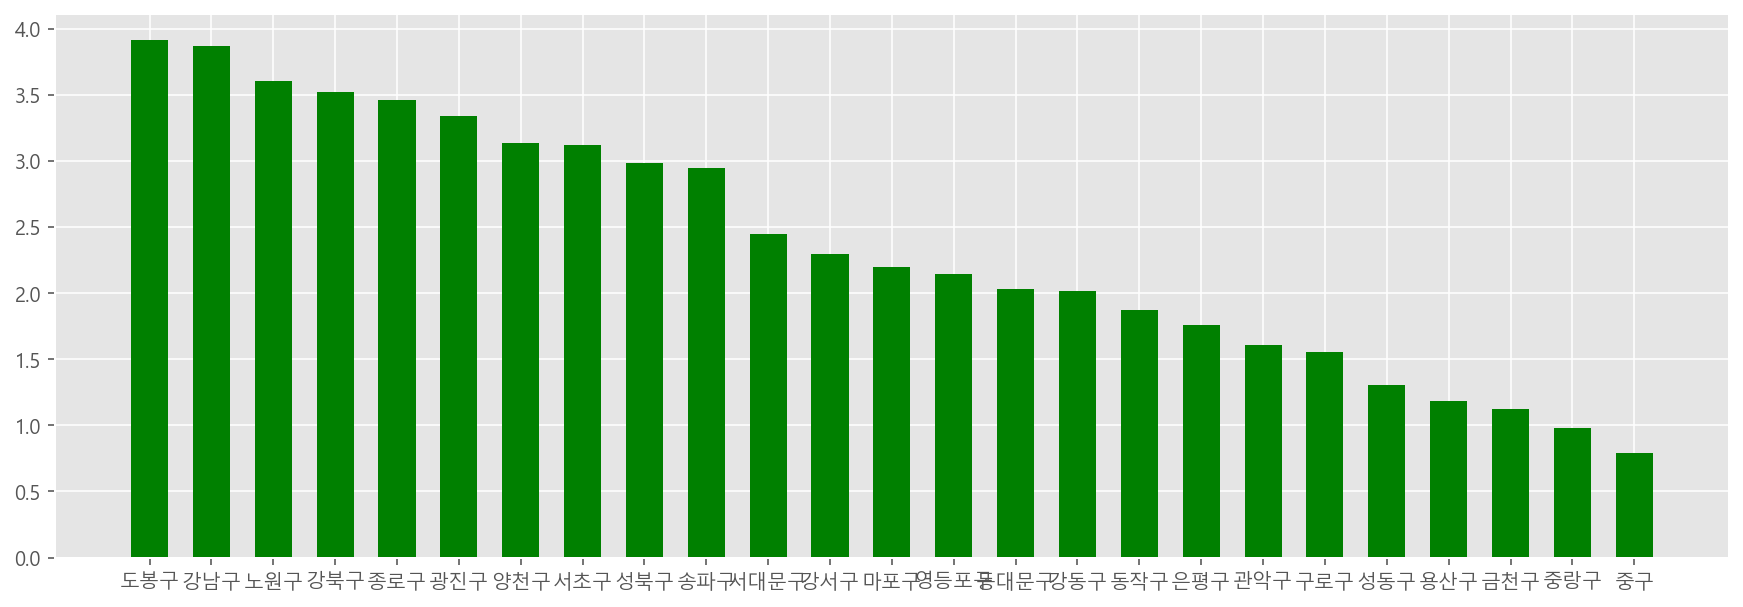

In [18]:
plt.figure(figsize=(15,5))

x=gradu_gugun.index
y=gradu_gugun['진학률']
plt.bar(x,y,width=0.6, color='green')
plt.show()

## 지하철 역들이 어떤 구군에 있는지 분류

In [19]:
subway_path = f'data/서울교통공사 역별 주소 현황 및 전화번호(구주소).xlsx'
raw_subway = pd.read_excel(subway_path)
raw_subway

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,연번,역명,호선,구,동,상세주소,전화번호
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301
...,...,...,...,...,...,...,...
274,274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220
275,275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230
276,276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240
277,277,수진,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 2205-1 수진역,6311-8250


In [20]:
raw_subway.shape

(279, 7)

In [21]:
raw_subway.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,연번,역명,호선,구,동,상세주소,전화번호
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301


In [22]:
raw_subway.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
274,274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220
275,275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230
276,276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240
277,277,수진,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 2205-1 수진역,6311-8250
278,278,모란,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 4808 모란역,6311-8260


In [23]:
raw_subway.index

RangeIndex(start=0, stop=279, step=1)

In [24]:
raw_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  279 non-null    object
 1   Unnamed: 1  279 non-null    object
 2   Unnamed: 2  279 non-null    object
 3   Unnamed: 3  279 non-null    object
 4   Unnamed: 4  279 non-null    object
 5   Unnamed: 5  279 non-null    object
 6   Unnamed: 6  279 non-null    object
dtypes: object(7)
memory usage: 15.4+ KB


In [25]:
raw_subway.columns=raw_subway.loc[0]
subway_data=raw_subway.drop(0).copy()
subway_data

,연번,역명,호선,구,동,상세주소,전화번호
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301
5,5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291
...,...,...,...,...,...,...,...
274,274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220
275,275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230
276,276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240
277,277,수진,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 2205-1 수진역,6311-8250


In [26]:
a=subway_data['상세주소'][1].split()[0]=='서울특별시'
a

True

In [27]:
def get_province(x):
    temp = x.split(' ')
    sido = temp[0]      
    
    return sido

subway_data['시도'] = subway_data['상세주소'].dropna().apply(get_province)
subway_data

,연번,역명,호선,구,동,상세주소,전화번호,시도
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331,서울특별시
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321,서울특별시
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311,서울특별시
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301,서울특별시
5,5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291,서울특별시
...,...,...,...,...,...,...,...,...
274,274,남한산성입구(성남법원•검찰청),8,성남시,수정구 단대동,경기도 성남시 수정구 단대동 96 남한산성입구역,6311-8220,경기도
275,275,단대오거리,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 단대오거리역,6311-8230,경기도
276,276,신흥,8,성남시,수정구 신흥동,경기도 성남시 수정구 신흥동 2467 신흥역,6311-8240,경기도
277,277,수진,8,성남시,수정구 수진동,경기도 성남시 수정구 수진동 2205-1 수진역,6311-8250,경기도


In [28]:
subway_seoul=subway_data[subway_data['시도']=='서울특별시'].copy()
subway_seoul

,연번,역명,호선,구,동,상세주소,전화번호,시도
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331,서울특별시
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321,서울특별시
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311,서울특별시
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301,서울특별시
5,5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291,서울특별시
...,...,...,...,...,...,...,...,...
268,268,송파,8,송파구,가락동,서울특별시 송파구 가락동 459-4 송파역,6311-8160,서울특별시
269,269,가락시장,8,송파구,가락동,"서울특별시 송파구 가락동 184-23 가락시장역(3, 8호선)",6311-8170,서울특별시
270,270,문정,8,송파구,문정동,서울특별시 송파구 문정동 119-4 문정역,6311-8180,서울특별시
271,271,장지,8,송파구,장지동,서울특별시 송파구 장지동 201-5 장지역,6311-8190,서울특별시


In [29]:
subway_seoul[subway_seoul['구']=='강남']['구']

29    강남
30    강남
31    강남
32    강남
Name: 구, dtype: object

In [30]:
subway_seoul.loc[subway_seoul['구']=='강남',"구"] = '강남구'
subway_seoul

,연번,역명,호선,구,동,상세주소,전화번호,시도
1,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331,서울특별시
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321,서울특별시
3,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311,서울특별시
4,4,종로3가,1,종로구,종로3가,서울특별시 종로3가 10-5 1호선 종로3가역(1호선),6110-1301,서울특별시
5,5,종로5가,1,종로구,종로5가,서울특별시 종로구 종로5가 82-1 1호선 종로5가역,6110-1291,서울특별시
...,...,...,...,...,...,...,...,...
268,268,송파,8,송파구,가락동,서울특별시 송파구 가락동 459-4 송파역,6311-8160,서울특별시
269,269,가락시장,8,송파구,가락동,"서울특별시 송파구 가락동 184-23 가락시장역(3, 8호선)",6311-8170,서울특별시
270,270,문정,8,송파구,문정동,서울특별시 송파구 문정동 119-4 문정역,6311-8180,서울특별시
271,271,장지,8,송파구,장지동,서울특별시 송파구 장지동 201-5 장지역,6311-8190,서울특별시


In [31]:
ppl_path = f'data/서울교통공사_관할역별_일별_시간대별_이용인원_20181231.xlsx'
raw_ppl = pd.read_excel(ppl_path)
raw_ppl

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,(단위:명)
0,날짜,평토휴 구분,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,휴,1호선,150,서울역,승차,373,318,365,785,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,휴,1호선,150,서울역,하차,205,1040,872,984,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,휴,1호선,151,시청,승차,87,105,124,197,...,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,휴,1호선,151,시청,하차,47,294,497,1017,...,781,702,552,388,308,236,160,100,39,10945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200746,2018-12-31 00:00:00,평,8호선,2825,신흥,하차,20,83,92,194,...,440,445,536,455,321,253,219,179,396,5569
200747,2018-12-31 00:00:00,평,8호선,2826,수진,승차,91,208,467,652,...,435,366,392,227,169,148,118,62,513,6129
200748,2018-12-31 00:00:00,평,8호선,2826,수진,하차,18,91,136,356,...,342,390,451,395,288,248,327,203,387,5605
200749,2018-12-31 00:00:00,평,8호선,2827,모란,승차,55,84,284,425,...,343,391,334,233,157,180,139,94,189,4885


In [32]:
raw_ppl.shape

(200751, 27)

In [33]:
raw_ppl.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,(단위:명)
0,날짜,평토휴 구분,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,휴,1호선,150,서울역,승차,373,318,365,785,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,휴,1호선,150,서울역,하차,205,1040,872,984,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,휴,1호선,151,시청,승차,87,105,124,197,...,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,휴,1호선,151,시청,하차,47,294,497,1017,...,781,702,552,388,308,236,160,100,39,10945


In [34]:
raw_ppl.tail()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,(단위:명)
200746,2018-12-31 00:00:00,평,8호선,2825,신흥,하차,20,83,92,194,...,440,445,536,455,321,253,219,179,396,5569
200747,2018-12-31 00:00:00,평,8호선,2826,수진,승차,91,208,467,652,...,435,366,392,227,169,148,118,62,513,6129
200748,2018-12-31 00:00:00,평,8호선,2826,수진,하차,18,91,136,356,...,342,390,451,395,288,248,327,203,387,5605
200749,2018-12-31 00:00:00,평,8호선,2827,모란,승차,55,84,284,425,...,343,391,334,233,157,180,139,94,189,4885
200750,2018-12-31 00:00:00,평,8호선,2827,모란,하차,15,87,133,329,...,285,335,387,283,181,216,185,113,828,4595


In [35]:
raw_ppl.index

RangeIndex(start=0, stop=200751, step=1)

In [36]:
raw_ppl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200751 entries, 0 to 200750
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   200751 non-null  object
 1   Unnamed: 1   200751 non-null  object
 2   Unnamed: 2   200751 non-null  object
 3   Unnamed: 3   200751 non-null  object
 4   Unnamed: 4   200751 non-null  object
 5   Unnamed: 5   200751 non-null  object
 6   Unnamed: 6   200751 non-null  object
 7   Unnamed: 7   200751 non-null  object
 8   Unnamed: 8   200751 non-null  object
 9   Unnamed: 9   200751 non-null  object
 10  Unnamed: 10  200751 non-null  object
 11  Unnamed: 11  200751 non-null  object
 12  Unnamed: 12  200751 non-null  object
 13  Unnamed: 13  200751 non-null  object
 14  Unnamed: 14  200751 non-null  object
 15  Unnamed: 15  200751 non-null  object
 16  Unnamed: 16  200751 non-null  object
 17  Unnamed: 17  200751 non-null  object
 18  Unnamed: 18  200751 non-null  object
 19  Un

In [37]:
raw_ppl.dtypes

Unnamed: 0     object
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
Unnamed: 8     object
Unnamed: 9     object
Unnamed: 10    object
Unnamed: 11    object
Unnamed: 12    object
Unnamed: 13    object
Unnamed: 14    object
Unnamed: 15    object
Unnamed: 16    object
Unnamed: 17    object
Unnamed: 18    object
Unnamed: 19    object
Unnamed: 20    object
Unnamed: 21    object
Unnamed: 22    object
Unnamed: 23    object
Unnamed: 24    object
Unnamed: 25    object
(단위:명)         object
dtype: object

In [38]:
raw_ppl.columns=raw_ppl.loc[0]
ppl_data=raw_ppl.drop(0).copy()
ppl_data

,날짜,평토휴 구분,호선,역번호,역명,구분,05 ~ 06,06 ~ 07,07 ~ 08,08 ~ 09,...,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,00 ~ 01,합 계
1,2018-01-01 00:00:00,휴,1호선,150,서울역,승차,373,318,365,785,...,3476,3891,3227,2945,2382,3070,1750,781,96,40393
2,2018-01-01 00:00:00,휴,1호선,150,서울역,하차,205,1040,872,984,...,2885,2845,2337,2131,1669,1404,868,477,147,34730
3,2018-01-01 00:00:00,휴,1호선,151,시청,승차,87,105,124,197,...,1027,1102,1278,1163,1032,975,553,214,9,12298
4,2018-01-01 00:00:00,휴,1호선,151,시청,하차,47,294,497,1017,...,781,702,552,388,308,236,160,100,39,10945
5,2018-01-01 00:00:00,휴,1호선,152,종각,승차,604,399,191,250,...,2127,2172,2171,1873,1935,2084,1458,580,28,22621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200746,2018-12-31 00:00:00,평,8호선,2825,신흥,하차,20,83,92,194,...,440,445,536,455,321,253,219,179,396,5569
200747,2018-12-31 00:00:00,평,8호선,2826,수진,승차,91,208,467,652,...,435,366,392,227,169,148,118,62,513,6129
200748,2018-12-31 00:00:00,평,8호선,2826,수진,하차,18,91,136,356,...,342,390,451,395,288,248,327,203,387,5605
200749,2018-12-31 00:00:00,평,8호선,2827,모란,승차,55,84,284,425,...,343,391,334,233,157,180,139,94,189,4885


* 역별 2018년도 한해 이용객 수 도출!

In [39]:
ppl_sum=ppl_data.pivot_table(index='역명',values='합 계',aggfunc='sum')
ppl_sum=ppl_sum.reset_index()
ppl_sum=ppl_sum.sort_values(by='합 계',ascending=False)
ppl_sum.columns=['역명','승하차 총합계']

In [40]:
ppl_sum

,역명,승하차 총합계
196,잠실(송파구청),75844902
2,강남,74509854
236,홍대입구,60241918
15,고속터미널,58550036
106,사당,53081616
...,...,...
40,남태령,1720186
201,장암,1285261
140,신답,1168973
213,지축,1012460


* 구 있던 subway_seoul이랑 합쳐서 역명, 구, 이용객 합계 한번에 나오게 하기

In [41]:
# 구랑 시군구 기준으로 합치기 (df_vs.merge : df_vs를 기준으로 df_gu_mean 합칠거야 어떻게? inner로(키 겹치는 것만) 합칠거고 left는 기준이 되는 테이블의 기준 컬럼, right는 합쳐지는 얘의 컬럼)
subway_seoul = subway_seoul.merge(ppl_sum, how='inner', left_on="역명", right_on="역명")
subway_seoul

,연번,역명,호선,구,동,상세주소,전화번호,시도,승하차 총합계
0,1,서울역,1,중구,봉래동,서울특별시 중구 봉래동2가 122 서울역(1호선),6110-1331,서울특별시,52626817
1,113,서울역,4,용산구,용산구,서울특별시 중구 용산구 동자동 14-151 서울역(4호선),6110-4261,서울특별시,52626817
2,2,시청,1,중구,정동,서울특별시 중구 정동 5-5 시청역(1호선),6110-1321,서울특별시,35557058
3,11,시청,2,중구,서소문동,서울특별시 중구 서소문동 90-1 시청역(2호선),6110-2011,서울특별시,35557058
4,3,종각,1,종로구,종로1가,서울특별시 종로구 종로1가 54 종각지하철역사,6110-1311,서울특별시,31159274
...,...,...,...,...,...,...,...,...,...
250,267,석촌,8,송파구,석촌동,서울특별시 송파구 석촌동 209 석촌역,6311-8150,서울특별시,6790870
251,268,송파,8,송파구,가락동,서울특별시 송파구 가락동 459-4 송파역,6311-8160,서울특별시,3975113
252,270,문정,8,송파구,문정동,서울특별시 송파구 문정동 119-4 문정역,6311-8180,서울특별시,12305513
253,271,장지,8,송파구,장지동,서울특별시 송파구 장지동 201-5 장지역,6311-8190,서울특별시,13200408


In [42]:
subway_seoul_count=subway_seoul.pivot_table(index='구',values='승하차 총합계',aggfunc='mean')
subway_seoul_count.reset_index()
subway_seoul_count

,승하차 총합계
구,
강남구,2.042912e+07
강동구,1.237959e+07
강북구,2.063159e+07
강서구,1.145215e+07
관악구,3.691019e+07
광진구,2.064554e+07
구로구,2.192614e+07
금천구,2.836978e+07
노원구,1.419240e+07


## 집값 가져오기

In [43]:
price_path = f'data/part1_평균매매가격_아파트.xlsx'
raw_price = pd.read_excel(price_path, skiprows=10)
raw_price

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,...,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월
0,전국,NaN,NaN,NaN,264474,264035,263470,262630,261823,260425,...,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915
1,수도권,NaN,NaN,NaN,365249,364275,362790,360918,359253,356737,...,427909,433036,438388,441072,442293,442791,443063,443484,445796,452134
2,지방권,NaN,NaN,NaN,163394,163491,163849,164044,164096,163820,...,205138,204969,204847,204747,204545,204117,203639,203196,202580,202359
3,6대광역시,NaN,NaN,NaN,195186,194989,195093,195037,194851,194273,...,257439,257577,257757,257913,258022,257979,257734,257504,257083,257274
4,5대광역시,NaN,NaN,NaN,190421,190312,190555,190603,190631,190183,...,256837,257017,257173,257333,257482,257461,257185,256982,256667,256974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,NaN,거제시,NaN,NaN,181049,181585,182488,183663,183272,181673,...,165053,162246,160395,158018,155123,150728,147500,144175,141430,139061
232,NaN,양산시,NaN,NaN,130287,130202,129489,128351,127287,126298,...,163272,162918,162750,162695,162379,161938,161499,161264,160954,160506
233,제주,NaN,NaN,NaN,134994,139424,139830,141365,144561,144540,...,298038,296765,296579,296789,295702,295115,294989,294256,292550,291765
234,NaN,제주시,NaN,NaN,145425,150436,150769,152481,155972,155940,...,317970,316333,316091,316076,314742,314106,314000,313121,311439,310803


In [44]:
raw_price.shape

(236, 85)

In [45]:
raw_price.head()

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,...,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월
0,전국,NaN,NaN,NaN,264474,264035,263470,262630,261823,260425,...,313552,315961,318503,319757,320248,320271,320157,320135,320944,323915
1,수도권,NaN,NaN,NaN,365249,364275,362790,360918,359253,356737,...,427909,433036,438388,441072,442293,442791,443063,443484,445796,452134
2,지방권,NaN,NaN,NaN,163394,163491,163849,164044,164096,163820,...,205138,204969,204847,204747,204545,204117,203639,203196,202580,202359
3,6대광역시,NaN,NaN,NaN,195186,194989,195093,195037,194851,194273,...,257439,257577,257757,257913,258022,257979,257734,257504,257083,257274
4,5대광역시,NaN,NaN,NaN,190421,190312,190555,190603,190631,190183,...,256837,257017,257173,257333,257482,257461,257185,256982,256667,256974


In [46]:
raw_price.tail()

,지 역,Unnamed: 1,Unnamed: 2,Unnamed: 3,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,...,2017년 12월,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월
231,NaN,거제시,NaN,NaN,181049,181585,182488,183663,183272,181673,...,165053,162246,160395,158018,155123,150728,147500,144175,141430,139061
232,NaN,양산시,NaN,NaN,130287,130202,129489,128351,127287,126298,...,163272,162918,162750,162695,162379,161938,161499,161264,160954,160506
233,제주,NaN,NaN,NaN,134994,139424,139830,141365,144561,144540,...,298038,296765,296579,296789,295702,295115,294989,294256,292550,291765
234,NaN,제주시,NaN,NaN,145425,150436,150769,152481,155972,155940,...,317970,316333,316091,316076,314742,314106,314000,313121,311439,310803
235,NaN,서귀포시,NaN,NaN,80868,82283,83067,83683,85350,85383,...,228139,228139,228153,229153,228931,228514,228319,228097,226306,225000


In [47]:
raw_price.index

RangeIndex(start=0, stop=236, step=1)

In [48]:
raw_price.columns

Index(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', '2012년 01월',
       '2012년 02월', '2012년 03월', '2012년 04월', '2012년 05월', '2012년 06월',
       '2012년 07월', '2012년 08월', '2012년 09월', '2012년 10월', '2012년 11월',
       '2012년 12월', '2013년 01월', '2013년 02월', '2013년 03월', '2013년 04월',
       '2013년 05월', '2013년 06월', '2013년 07월', '2013년 08월', '2013년 09월',
       '2013년 10월', '2013년 11월', '2013년 12월', '2014년 01월', '2014년 02월',
       '2014년 03월', '2014년 04월', '2014년 05월', '2014년 06월', '2014년 07월',
       '2014년 08월', '2014년 09월', '2014년 10월', '2014년 11월', '2014년 12월',
       '2015년 01월', '2015년 02월', '2015년 03월', '2015년 04월', '2015년 05월',
       '2015년 06월', '2015년 07월', '2015년 08월', '2015년 09월', '2015년 10월',
       '2015년 11월', '2015년 12월', '2016년 01월', '2016년 02월', '2016년 03월',
       '2016년 04월', '2016년 05월', '2016년 06월', '2016년 07월', '2016년 08월',
       '2016년 09월', '2016년 10월', '2016년 11월', '2016년 12월', '2017년 01월',
       '2017년 02월', '2017년 03월', '2017년 04월', '2017년 05월', '2017년 0

In [49]:
raw_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지 역         24 non-null     object
 1   Unnamed: 1  101 non-null    object
 2   Unnamed: 2  66 non-null     object
 3   Unnamed: 3  45 non-null     object
 4   2012년 01월   236 non-null    object
 5   2012년 02월   236 non-null    object
 6   2012년 03월   236 non-null    object
 7   2012년 04월   236 non-null    object
 8   2012년 05월   236 non-null    object
 9   2012년 06월   236 non-null    object
 10  2012년 07월   236 non-null    object
 11  2012년 08월   236 non-null    object
 12  2012년 09월   236 non-null    object
 13  2012년 10월   236 non-null    object
 14  2012년 11월   236 non-null    object
 15  2012년 12월   236 non-null    object
 16  2013년 01월   236 non-null    object
 17  2013년 02월   236 non-null    object
 18  2013년 03월   236 non-null    object
 19  2013년 04월   236 non-null    object
 20  2013년 05월 

In [50]:
raw_price.dtypes

지 역           object
Unnamed: 1    object
Unnamed: 2    object
Unnamed: 3    object
2012년 01월     object
               ...  
2018년 05월     object
2018년 06월     object
2018년 07월     object
2018년 08월     object
2018년 09월     object
Length: 85, dtype: object

In [51]:
# 인덱스 정렬
big_col = []
for num, temp in enumerate(raw_price['지 역']):
    if pd.isna(temp) :
        big_col.append(big_col[num-1])
    else:
        big_col.append(temp)

        small_col = []
for num in range(len(raw_price)): #236번 돌거임, num은 그냥 인덱스
    temp_list = list(raw_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
    for temp in temp_list[3::-1]: # ['지역, 'unnamed: 1',,,, 가 역순된거임]
        if not pd.isna(temp):
            small_col.append(temp)
            break
            
raw_price.index = [big_col, small_col]
raw_price


지 역 Unnamed: 1 Unnamed: 2 Unnamed: 3 2012년 01월 2012년 02월  \
전국    전국        전국        NaN        NaN        NaN    264474    264035   
수도권   수도권      수도권        NaN        NaN        NaN    365249    364275   
지방권   지방권      지방권        NaN        NaN        NaN    163394    163491   
6대광역시 6대광역시  6대광역시        NaN        NaN        NaN    195186    194989   
5대광역시 5대광역시  5대광역시        NaN        NaN        NaN    190421    190312   
...            ...        ...        ...        ...       ...       ...   
경남    거제시      NaN        거제시        NaN        NaN    181049    181585   
      양산시      NaN        양산시        NaN        NaN    130287    130202   
제주    제주        제주        NaN        NaN        NaN    134994    139424   
      제주시      NaN        제주시        NaN        NaN    145425    150436   
      서귀포시     NaN       서귀포시        NaN        NaN     80868     82283   

            2012년 03월 2012년 04월 2012년 05월 2012년 06월  ... 2017년 12월 2018년 01월  \
전국    전국       263470    262630    261823    260425  ...    313552    315961   
수도권   수도권      362790    360918    359253    356737  ...    427909    433036   
지방권   지방권      163849    164044    164096    163820  ...    205138    204969   
6대광역시 6대광역시    195093    195037    194851    194273  ...    257439    257577   
5대광역시 5대광역시    190555    190603    190631    190183  ...    256837    257017   
...               ...       ...       ...       ...  ...       ...       ...   
경남    거제시      182488    183663    183272    181673  ...    165053    162246   
      양산시      129489    128351    127287    126298  ...    163272    162918   
제주    제주       139830    141365    144561    144540  ...    298038    296765   
      제주시      150769    152481    155972    155940  ...    317970    316333   
      서귀포시      83067     83683     85350     85383  ...    228139    228139   

            2018년 02월 2018년 03월 2018년 04월 2018년 05월 2018년 06월 2018년 07월  \
전국    전국       318503    319757    320248    320271    320157    320135   
수도권   수도권      438388    441072    442293    442791    443063    443484   
지방권   지방권      204847    204747    204545    204117    203639    203196   
6대광역시 6대광역시    257757    257913    258022    257979    257734    257504   
5대광역시 5대광역시    257173    257333    257482    257461    257185    256982   
...               ...       ...       ...       ...       ...       ...   
경남    거제시      160395    158018    155123    150728    147500    144175   
      양산시      162750    162695    162379    161938    161499    161264   
제주    제주       296579    296789    295702    295115    294989    294256   
      제주시      316091    316076    314742    314106    314000    313121   
      서귀포시     228153    229153    228931    228514    228319    228097   

            2018년 08월 2018년 09월  
전국    전국       320944    323915  
수도권   수도권      445796    452134  
지방권   지방권      202580    202359  
6대광역시 6대광역시    257083    257274  
5대광역시 5대광역시    256667    256974  
...               ...       ...  
경남    거제시      141430    139061  
      양산시      160954    160506  
제주    제주       292550    291765  
      제주시      311439    310803  
      서귀포시     226306    225000  

[236 rows x 85 columns]

In [52]:
transposed_price = raw_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T #뒤집기
transposed_price

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
               전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012년 01월  264474  365249  163394  195186  190421  211371  139237  540954   
2012년 02월  264035  364275  163491  194989  190312  211340  139518  538876   
2012년 03월  263470  362790  163849  195093  190555  211142  139979  536079   
2012년 04월  262630  360918  164044  195037  190603  210804  140306  532409   
2012년 05월  261823  359253  164096  194851  190631  210270  140378  529733   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2018년 05월  320271  442791  204117  257979  257461  239625  156081  694435   
2018년 06월  320157  443063  203639  257734  257185  239447  155401  694739   
2018년 07월  320135  443484  203196  257504  256982  239152  154716  695931   
2018년 08월  320944  445796  202580  257083  256667  238908  153821  702383   
2018년 09월  323915  452134  202359  257274  256974  240035  153151  716453   

                           ...      경남                                  \
             강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012년 01월  405962  706316  ...  157468  143155  101292  172711  105897   
2012년 02월  405406  705830  ...  157582  143155  101292  171124  105897   
2012년 03월  404184  702286  ...  159802  143507  101519  169589  105897   
2012년 04월  402746  701482  ...  159814  143162  101519  168874  105971   
2012년 05월  401085  700462  ...  159700  143207  101519  168084  105971   
...           ...     ...  ...     ...     ...     ...     ...     ...   
2018년 05월  514258  889833  ...  201220  142129  142315  183866  122489   
2018년 06월  516310  893521  ...  200830  141484  141074  182739  121339   
2018년 07월  518747  899063  ...  200270  139339  140530  181694  121098   
2018년 08월  523574  912257  ...  199860  137032  139935  178716  119886   
2018년 09월  531666  924886  ...  199370  136226  139620  176149  119761   

                               제주                  
              거제시     양산시      제주     제주시    서귀포시  
2012년 01월  181049  130287  134994  145425   80868  
2012년 02월  181585  130202  139424  150436   82283  
2012년 03월  182488  129489  139830  150769   83067  
2012년 04월  183663  128351  141365  152481   83683  
2012년 05월  183272  127287  144561  155972   85350  
...           ...     ...     ...     ...     ...  
2018년 05월  150728  161938  295115  314106  228514  
2018년 06월  147500  161499  294989  314000  228319  
2018년 07월  144175  161264  294256  313121  228097  
2018년 08월  141430  160954  292550  311439  226306  
2018년 09월  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [53]:
time_index = []
for time in transposed_price.index:
    temp = time.split(' ')
    time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

transposed_price.index = pd.to_datetime(time_index)
transposed_price

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012-01-01  264474  365249  163394  195186  190421  211371  139237  540954   
2012-02-01  264035  364275  163491  194989  190312  211340  139518  538876   
2012-03-01  263470  362790  163849  195093  190555  211142  139979  536079   
2012-04-01  262630  360918  164044  195037  190603  210804  140306  532409   
2012-05-01  261823  359253  164096  194851  190631  210270  140378  529733   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-05-01  320271  442791  204117  257979  257461  239625  156081  694435   
2018-06-01  320157  443063  203639  257734  257185  239447  155401  694739   
2018-07-01  320135  443484  203196  257504  256982  239152  154716  695931   
2018-08-01  320944  445796  202580  257083  256667  238908  153821  702383   
2018-09-01  323915  452134  202359  257274  256974  240035  153151  716453   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012-01-01  405962  706316  ...  157468  143155  101292  172711  105897   
2012-02-01  405406  705830  ...  157582  143155  101292  171124  105897   
2012-03-01  404184  702286  ...  159802  143507  101519  169589  105897   
2012-04-01  402746  701482  ...  159814  143162  101519  168874  105971   
2012-05-01  401085  700462  ...  159700  143207  101519  168084  105971   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2018-05-01  514258  889833  ...  201220  142129  142315  183866  122489   
2018-06-01  516310  893521  ...  200830  141484  141074  182739  121339   
2018-07-01  518747  899063  ...  200270  139339  140530  181694  121098   
2018-08-01  523574  912257  ...  199860  137032  139935  178716  119886   
2018-09-01  531666  924886  ...  199370  136226  139620  176149  119761   

                                제주                  
               거제시     양산시      제주     제주시    서귀포시  
2012-01-01  181049  130287  134994  145425   80868  
2012-02-01  181585  130202  139424  150436   82283  
2012-03-01  182488  129489  139830  150769   83067  
2012-04-01  183663  128351  141365  152481   83683  
2012-05-01  183272  127287  144561  155972   85350  
...            ...     ...     ...     ...     ...  
2018-05-01  150728  161938  295115  314106  228514  
2018-06-01  147500  161499  294989  314000  228319  
2018-07-01  144175  161264  294256  313121  228097  
2018-08-01  141430  160954  292550  311439  226306  
2018-09-01  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [54]:
def gamjungwon_price_preprocessing(path):
    row_price = pd.read_excel(path, skiprows=10)
    
    big_col = []
    for num, temp in enumerate(raw_price['지 역']):
        if pd.isna(temp) :
            big_col.append(big_col[num-1])
        else:
            big_col.append(temp)


    small_col = []
    for num in range(len(raw_price)):
        temp_list = list(raw_price[['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']].iloc[num])
        for temp in temp_list[3::-1]:
            if not pd.isna(temp):
                small_col.append(temp)
                break

    raw_price.index = [big_col, small_col]
    
    transposed_price = raw_price.drop(['지 역', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1).T
    
    time_index = []
    for time in transposed_price.index:
        temp = time.split(' ')
        time_index.append(temp[0][:-1]+'.'+temp[1][:-1])

    transposed_price.index = pd.to_datetime(time_index)
    
    return transposed_price

price_data = gamjungwon_price_preprocessing(price_path)
price_data

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2012-01-01  264474  365249  163394  195186  190421  211371  139237  540954   
2012-02-01  264035  364275  163491  194989  190312  211340  139518  538876   
2012-03-01  263470  362790  163849  195093  190555  211142  139979  536079   
2012-04-01  262630  360918  164044  195037  190603  210804  140306  532409   
2012-05-01  261823  359253  164096  194851  190631  210270  140378  529733   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2018-05-01  320271  442791  204117  257979  257461  239625  156081  694435   
2018-06-01  320157  443063  203639  257734  257185  239447  155401  694739   
2018-07-01  320135  443484  203196  257504  256982  239152  154716  695931   
2018-08-01  320944  445796  202580  257083  256667  238908  153821  702383   
2018-09-01  323915  452134  202359  257274  256974  240035  153151  716453   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2012-01-01  405962  706316  ...  157468  143155  101292  172711  105897   
2012-02-01  405406  705830  ...  157582  143155  101292  171124  105897   
2012-03-01  404184  702286  ...  159802  143507  101519  169589  105897   
2012-04-01  402746  701482  ...  159814  143162  101519  168874  105971   
2012-05-01  401085  700462  ...  159700  143207  101519  168084  105971   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2018-05-01  514258  889833  ...  201220  142129  142315  183866  122489   
2018-06-01  516310  893521  ...  200830  141484  141074  182739  121339   
2018-07-01  518747  899063  ...  200270  139339  140530  181694  121098   
2018-08-01  523574  912257  ...  199860  137032  139935  178716  119886   
2018-09-01  531666  924886  ...  199370  136226  139620  176149  119761   

                                제주                  
               거제시     양산시      제주     제주시    서귀포시  
2012-01-01  181049  130287  134994  145425   80868  
2012-02-01  181585  130202  139424  150436   82283  
2012-03-01  182488  129489  139830  150769   83067  
2012-04-01  183663  128351  141365  152481   83683  
2012-05-01  183272  127287  144561  155972   85350  
...            ...     ...     ...     ...     ...  
2018-05-01  150728  161938  295115  314106  228514  
2018-06-01  147500  161499  294989  314000  228319  
2018-07-01  144175  161264  294256  313121  228097  
2018-08-01  141430  160954  292550  311439  226306  
2018-09-01  139061  160506  291765  310803  225000  

[81 rows x 236 columns]

In [55]:
price_data[price_data.index.year==2018]

전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울  \
                전국     수도권     지방권   6대광역시   5대광역시     9개도     8개도      서울   
2018-01-01  315961  433036  204969  257577  257017  238264  158150  673522   
2018-02-01  318503  438388  204847  257757  257173  239005  157775  686220   
2018-03-01  319757  441072  204747  257913  257333  239525  157425  691838   
2018-04-01  320248  442293  204545  258022  257482  239805  156891  693673   
2018-05-01  320271  442791  204117  257979  257461  239625  156081  694435   
2018-06-01  320157  443063  203639  257734  257185  239447  155401  694739   
2018-07-01  320135  443484  203196  257504  256982  239152  154716  695931   
2018-08-01  320944  445796  202580  257083  256667  238908  153821  702383   
2018-09-01  323915  452134  202359  257274  256974  240035  153151  716453   

                            ...      경남                                  \
              강북지역     도심권  ...     진주시     통영시     사천시     김해시     밀양시   
2018-01-01  499764  853086  ...  203570  145177  144204  186418  124095   
2018-02-01  505766  870844  ...  202870  144161  143630  185978  124193   
2018-03-01  510345  881688  ...  202760  143694  143685  185470  123966   
2018-04-01  512411  886041  ...  201960  142790  143111  185007  123914   
2018-05-01  514258  889833  ...  201220  142129  142315  183866  122489   
2018-06-01  516310  893521  ...  200830  141484  141074  182739  121339   
2018-07-01  518747  899063  ...  200270  139339  140530  181694  121098   
2018-08-01  523574  912257  ...  199860  137032  139935  178716  119886   
2018-09-01  531666  924886  ...  199370  136226  139620  176149  119761   

                                제주                  
               거제시     양산시      제주     제주시    서귀포시  
2018-01-01  162246  162918  296765  316333  228139  
2018-02-01  160395  162750  296579  316091  228153  
2018-03-01  158018  162695  296789  316076  229153  
2018-04-01  155123  162379  295702  314742  228931  
2018-05-01  150728  161938  295115  314106  228514  
2018-06-01  147500  161499  294989  314000  228319  
2018-07-01  144175  161264  294256  313121  228097  
2018-08-01  141430  160954  292550  311439  226306  
2018-09-01  139061  160506  291765  310803  225000  

[9 rows x 236 columns]

* 2018년 서울지역 집값 평균

In [56]:
price_seoul=price_data[price_data.index.year==2018].mean()['서울'].reset_index()
price_seoul.columns=['지역','2018년 평균 매매가격']
price_seoul

,지역,2018년 평균 매매가격
0,서울,6.943549e+05
1,강북지역,5.147601e+05
2,도심권,8.901354e+05
3,종로구,6.192871e+05
4,중구,6.515463e+05
5,용산구,1.129747e+06
6,동북권,4.520812e+05
7,성동구,7.050140e+05
8,광진구,7.892601e+05
9,동대문구,4.590144e+05


In [57]:
seoul_gugun = subway_seoul_count.merge(gradu_gugun, how='inner', left_on=subway_seoul_count.index, right_on="구군")
seoul_gugun = seoul_gugun.merge(price_seoul, how='inner', left_on='구군', right_on='지역')
seoul_gugun.columns=['구군','2018년 평균 지하철 이용객 수','졸업자','과고진학자수','외고진학자수','특수목적고진학총합','진학률','지역','2018년 아파트 평균 매매가격']
seoul_gugun

,구군,2018년 평균 지하철 이용객 수,졸업자,과고진학자수,외고진학자수,특수목적고진학총합,진학률,지역,2018년 아파트 평균 매매가격
0,강남구,2.042912e+07,5224.0,80.0,122.0,202.0,3.866769,강남구,1.458838e+06
1,강동구,1.237959e+07,3575.0,16.0,56.0,72.0,2.013986,강동구,6.042978e+05
2,강북구,2.063159e+07,2355.0,14.0,69.0,83.0,3.524416,강북구,3.955128e+05
3,강서구,1.145215e+07,3836.0,18.0,70.0,88.0,2.294056,강서구,5.041101e+05
4,관악구,3.691019e+07,2793.0,16.0,29.0,45.0,1.611171,관악구,4.313537e+05
5,광진구,2.064554e+07,2932.0,29.0,69.0,98.0,3.342428,광진구,7.892601e+05
6,구로구,2.192614e+07,2890.0,13.0,32.0,45.0,1.557093,구로구,4.363296e+05
7,금천구,2.836978e+07,1600.0,8.0,10.0,18.0,1.125000,금천구,3.528601e+05
8,노원구,1.419240e+07,6161.0,46.0,176.0,222.0,3.603311,노원구,3.662223e+05
9,도봉구,1.747038e+07,2580.0,10.0,91.0,101.0,3.914729,도봉구,3.557202e+05


In [58]:
df_seoul=seoul_gugun[['구군','2018년 평균 지하철 이용객 수','진학률','2018년 아파트 평균 매매가격']]
df_seoul=df_seoul.set_index('구군')
df_seoul

,2018년 평균 지하철 이용객 수,진학률,2018년 아파트 평균 매매가격
구군,,,
강남구,2.042912e+07,3.866769,1.458838e+06
강동구,1.237959e+07,2.013986,6.042978e+05
강북구,2.063159e+07,3.524416,3.955128e+05
강서구,1.145215e+07,2.294056,5.041101e+05
관악구,3.691019e+07,1.611171,4.313537e+05
광진구,2.064554e+07,3.342428,7.892601e+05
구로구,2.192614e+07,1.557093,4.363296e+05
금천구,2.836978e+07,1.125000,3.528601e+05
노원구,1.419240e+07,3.603311,3.662223e+05


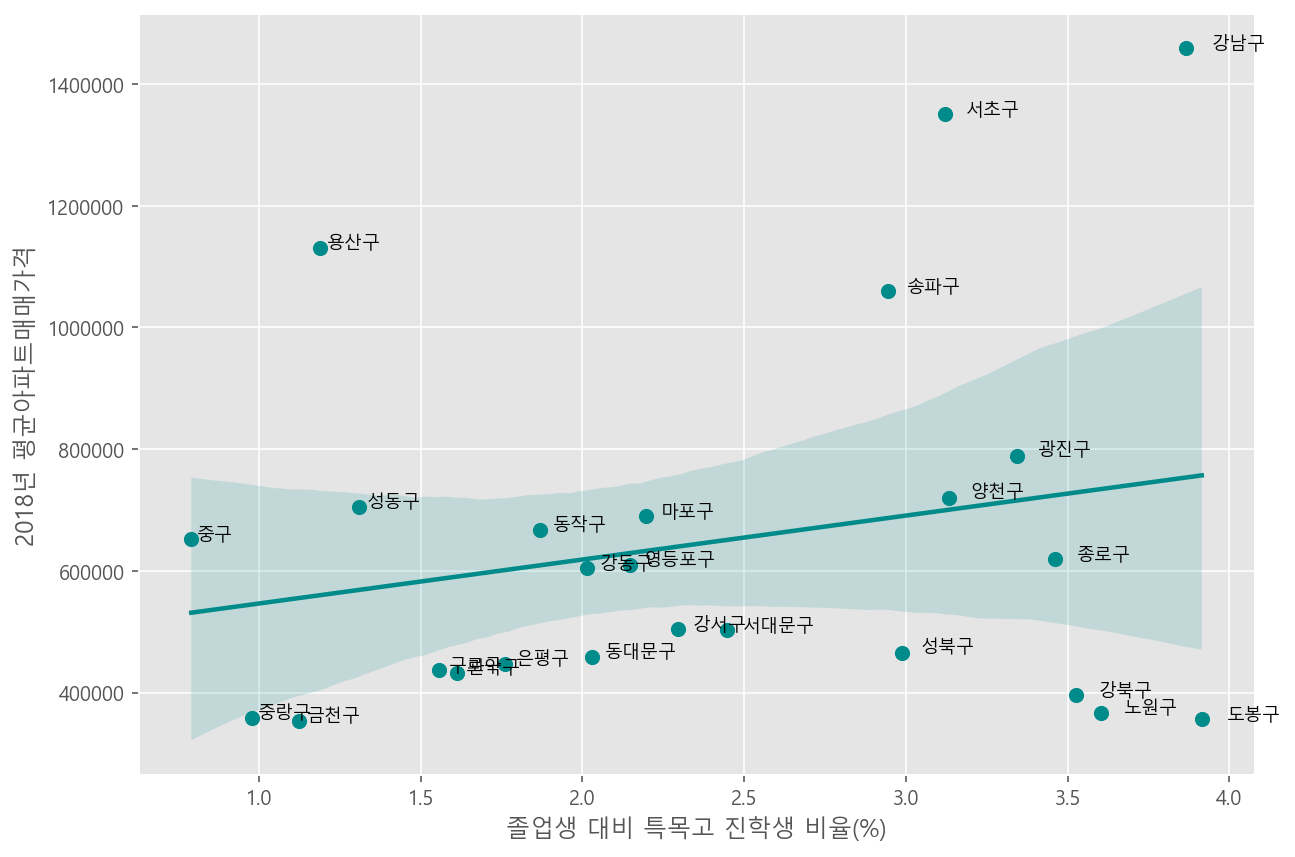

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.scatter(df_seoul['진학률'], df_seoul['2018년 아파트 평균 매매가격'], color='darkcyan', s=50)
sns.regplot(df_seoul['진학률'], df_seoul['2018년 아파트 평균 매매가격'], scatter=False, color='darkcyan')
plt.xlabel('졸업생 대비 특목고 진학생 비율(%)')
plt.ylabel('2018년 평균아파트매매가격')
for name in df_seoul.index:
    plt.text(df_seoul['진학률'][name]*1.02, df_seoul['2018년 아파트 평균 매매가격'][name], name, fontsize=9)
        
plt.show()

## 결과 1-1.
* 학군과 부동산 가격은 양의 상관관계를 갖는 경향성을 보인다.

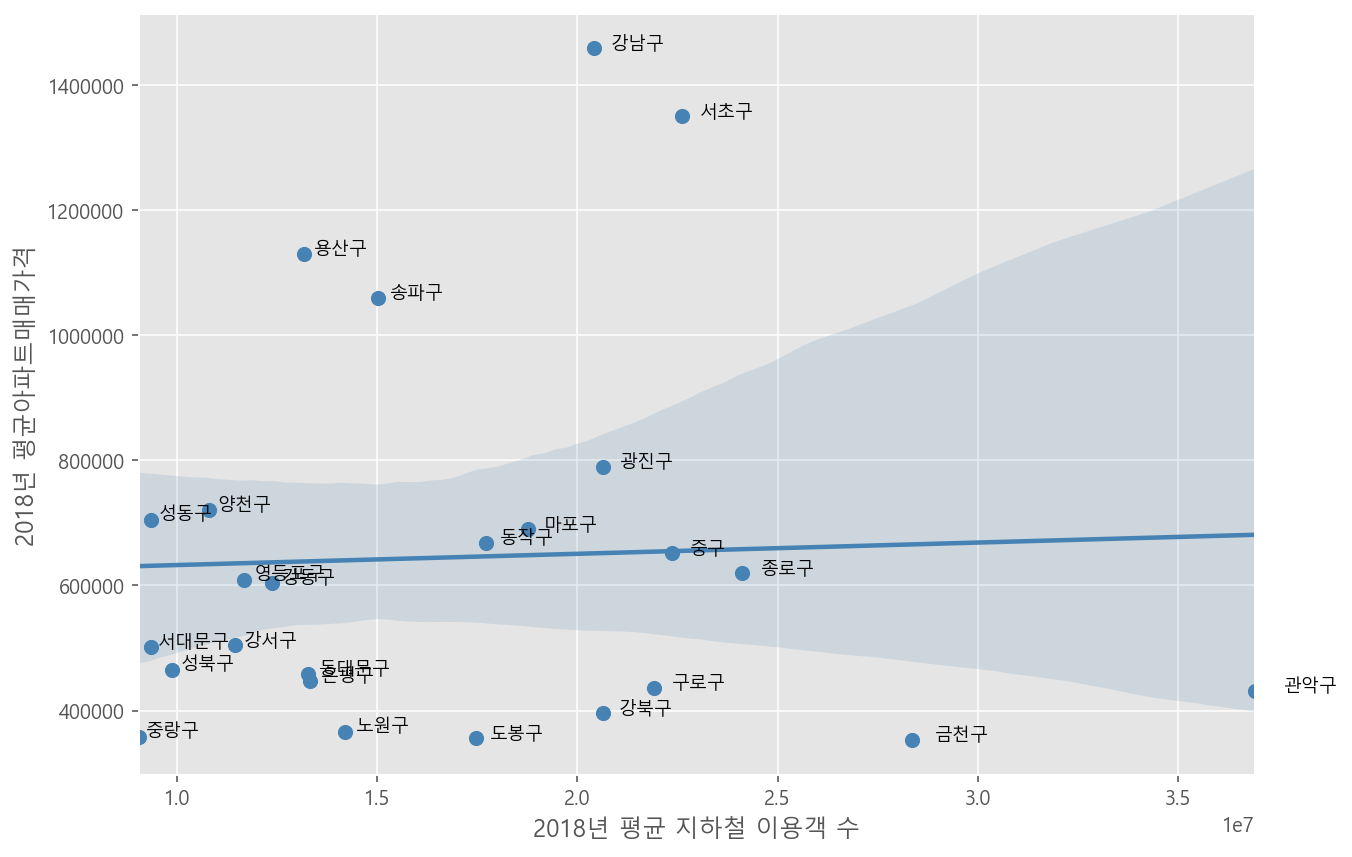

In [60]:
import seaborn as sns

plt.figure(figsize=(10, 7))
plt.scatter(df_seoul['2018년 평균 지하철 이용객 수'], df_seoul['2018년 아파트 평균 매매가격'], color='steelblue', s=50)
sns.regplot(df_seoul['2018년 평균 지하철 이용객 수'], df_seoul['2018년 아파트 평균 매매가격'], scatter=False, color='steelblue')
plt.xlabel('2018년 평균 지하철 이용객 수')
plt.ylabel('2018년 평균아파트매매가격')
for name in df_seoul.index:
    plt.text(df_seoul['2018년 평균 지하철 이용객 수'][name]*1.02, df_seoul['2018년 아파트 평균 매매가격'][name], name, fontsize=9)
        
plt.show()

## 결과 1-2. 
 * 지하철 이용객 수와 아파트 매매가격은 거의 상관관계를 갖지 않는다.

In [61]:
df_seoul.corr()

,2018년 평균 지하철 이용객 수,진학률,2018년 아파트 평균 매매가격
2018년 평균 지하철 이용객 수,1.000000,-0.004263,0.040041
진학률,-0.004263,1.000000,0.227788
2018년 아파트 평균 매매가격,0.040041,0.227788,1.000000


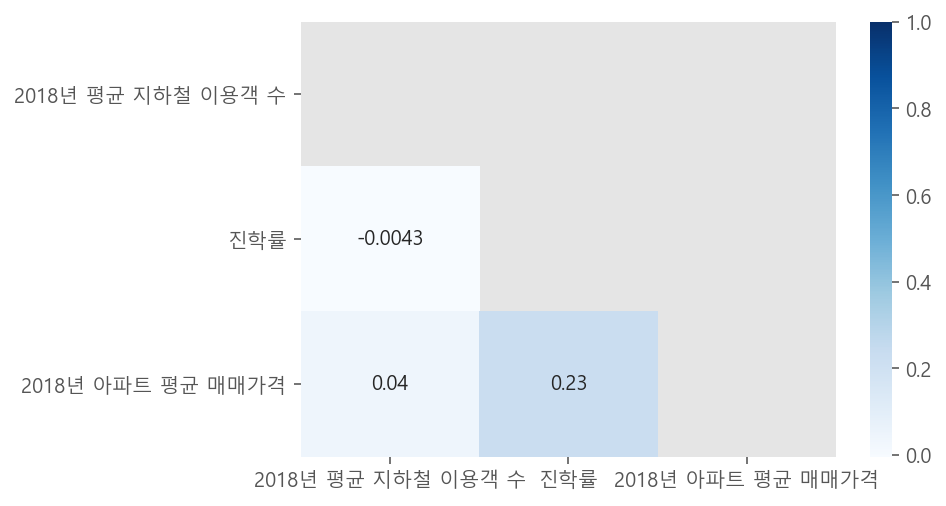

In [65]:
mask = np.triu(np.ones_like(df_seoul.corr(), dtype=np.bool))
sns.heatmap(df_seoul.corr(), annot=True, cmap="Blues", mask=mask)
plt.show()

* 위 상관계수를 보더라도 집값과 진학률은 약 0.23의 상관계수로 양의 상관관계를 갖고 집값과 지하철 이용객 수는 약 0.04로 거의 상관성을 띠지 않는다.

## 지도에 나타내보자

In [ ]:
import folium

In [ ]:
geo_path=f'data/part3_seoul_municipalities_geo_simple.json'
import json
geo_json=json.load(open(geo_path,encoding='utf-8'))

In [ ]:
m = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data = geo_json,
    data = df_seoul,
    columns = [df_seoul.index, '2018년 평균 지하철 이용객 수'],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name',fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average number of subway passengers(2018)'
).add_to(m)

In [ ]:
m

In [ ]:
m2 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data = geo_json,
    data = df_seoul,
    columns = [df_seoul.index, '진학률'],
    fill_color = 'YlGn', #'BuPu'
    key_on = 'feature.properties.name',fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Special Purpose High School Entrance Rate(2018)'
).add_to(m2)

In [ ]:
m2

In [ ]:
m3 = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
folium.Choropleth(
    geo_data = geo_json,
    data = df_seoul,
    columns = [df_seoul.index, '2018년 아파트 평균 매매가격'],
    fill_color = 'BuPu',
    key_on = 'feature.properties.name',fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Apartment Sale Price(2018)'
).add_to(m3)

In [ ]:
m3

* 지도를 보더라도 진학률과 아파트 매매가격은 경향성을 보이지만, 지하철 이용객 수와 아파트 매매가격은 경향성이 보이지 않는다. 